In [7]:
## uncomment if running on Google Colab

# %cd "/content"
# !rm -r ShapeSeries
# !git clone https://github.com/ErikVosburgh/ShapeSeries.git

# !pip install sklearn
# !pip install scikit-learn-extra
# !pip install 
# !pip install tabulate
# %cd "/content/ShapeSeries/Main"

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids 
import random
import datetime as dt
from tabulate import tabulate
from Shape_Scan_median_k import *
from kmeans_sensors import *
from kmedoids_sensors import *
from Load_Data import *

DEFINE OFFLINE/TRAINING-SET DATA:

In [9]:
param = 'Temperature'
units = 'Deg. C'
begin = '2022-09-04 00:00:00+00:00'
end = 	'2022-11-15 14:10:00+00:00'

color_list = ['purple', 'red', 'green', 'violet', 'pink', 'blue', 'black', 'orange', 'teal', 'brown', 'olive', 'cyan','yellow']
data_scaled = df_offline

DEFINE CLUSTER PARAMETERS 

In [10]:
slide_len_hrs = 24
slide_len = slide_len_hrs*12
hrs = 24
m = hrs*12
k = 8
cluster_method = 'kmed' #Enter 'km' for kmeans

GET CLUSTERS:

---------------
k = 8
SSE = 39.34
SC = 0.54


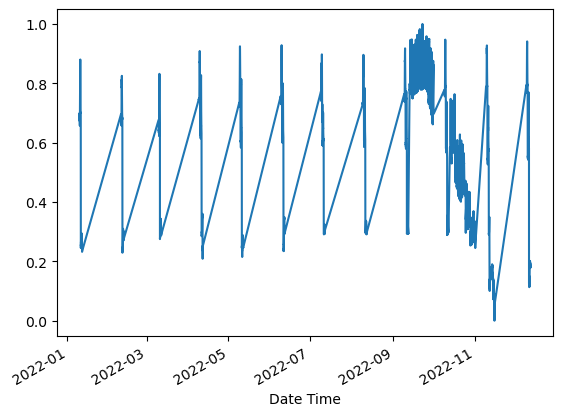

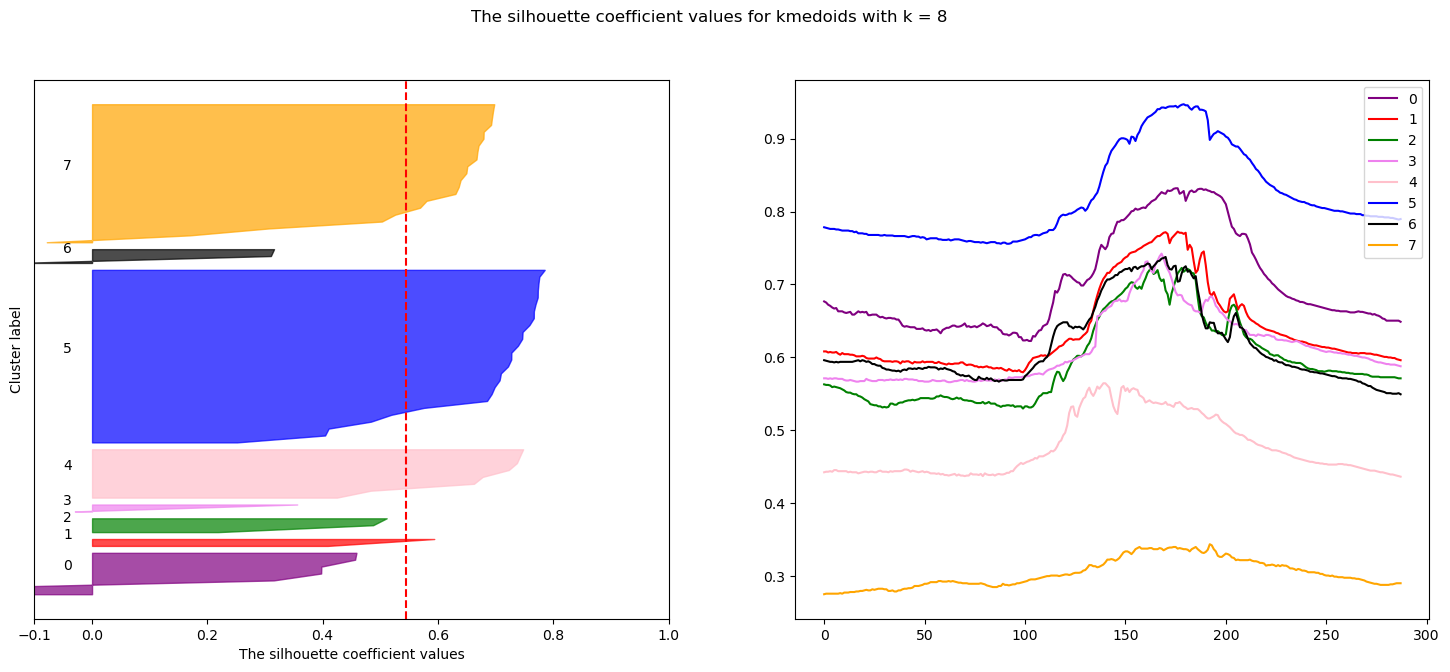

/Users/markwang/repos/ShapeSeries/Main/kmedoids_sensors.py:205: FutureWarning: DataFrame indexer for .iloc is deprecated and will be removed in a future version.
consider using .loc with a DataFrame indexer for automatic alignment.
  ts_df.iloc[segment_class != i] = np.nan
/Users/markwang/repos/ShapeSeries/Main/kmedoids_sensors.py:205: FutureWarning: DataFrame indexer for .iloc is deprecated and will be removed in a future version.
consider using .loc with a DataFrame indexer for automatic alignment.
  ts_df.iloc[segment_class != i] = np.nan
/Users/markwang/repos/ShapeSeries/Main/kmedoids_sensors.py:205: FutureWarning: DataFrame indexer for .iloc is deprecated and will be removed in a future version.
consider using .loc with a DataFrame indexer for automatic alignment.
  ts_df.iloc[segment_class != i] = np.nan
/Users/markwang/repos/ShapeSeries/Main/kmedoids_sensors.py:205: FutureWarning: DataFrame indexer for .iloc is deprecated and will be removed in a future version.
consider using .

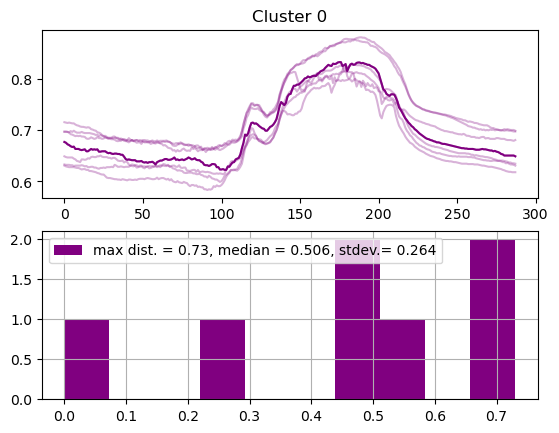

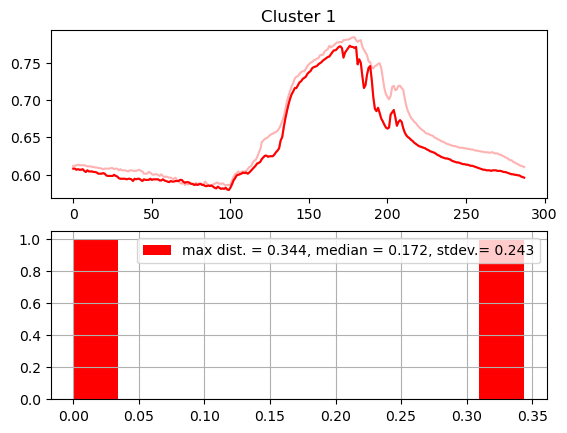

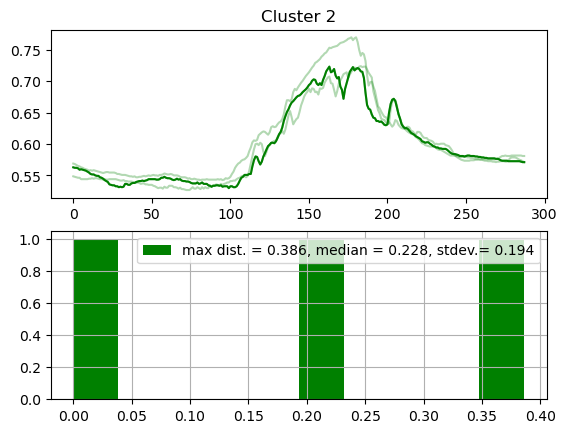

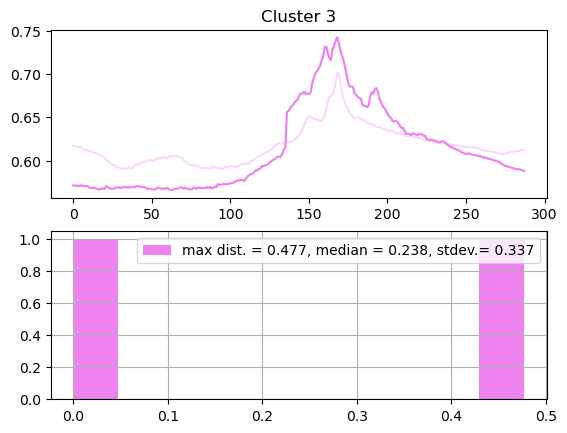

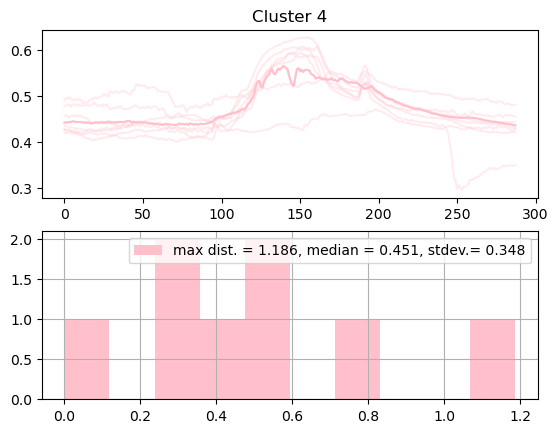

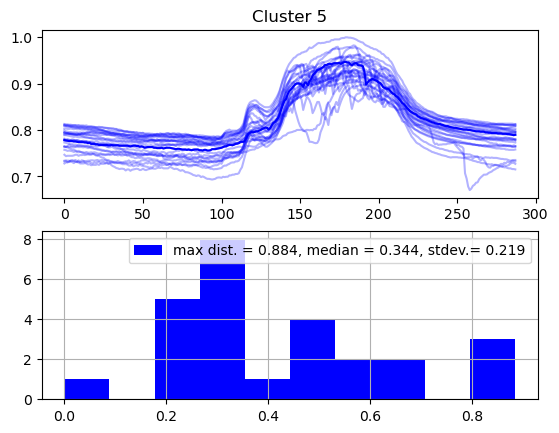

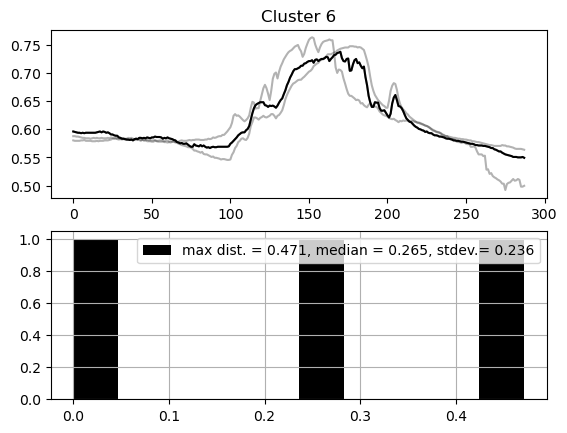

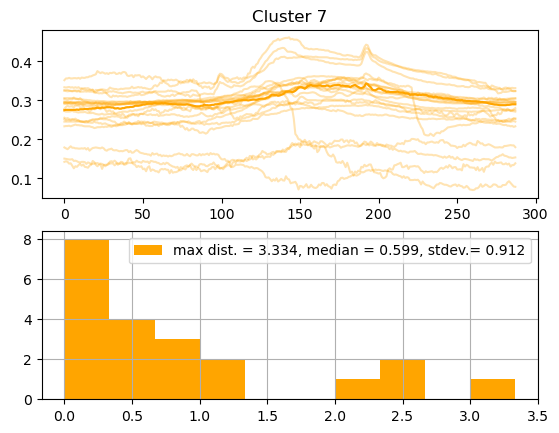

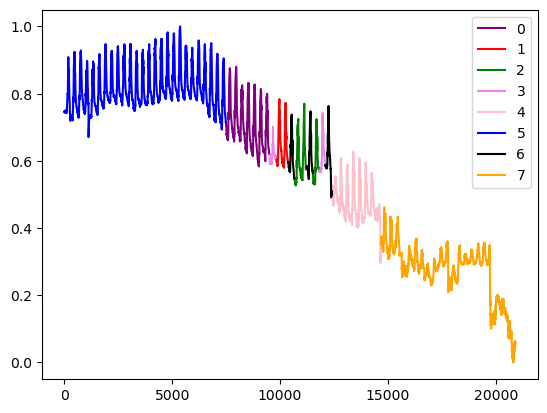

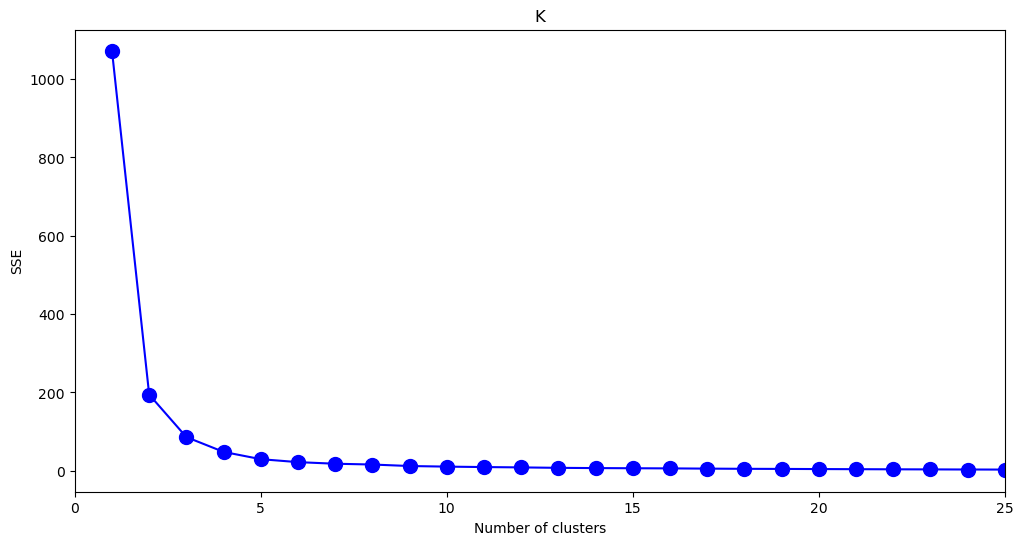

In [11]:
thresh_df_kmed,std_df_kmed,centroids_kmed,SSE_kmed,CHS_kmed,SC_kmed  = kmedoids_ts(data_scaled,k,slide_len,m, color_list)



---------------
k = 8
SSE = 15.01
SC = 0.50


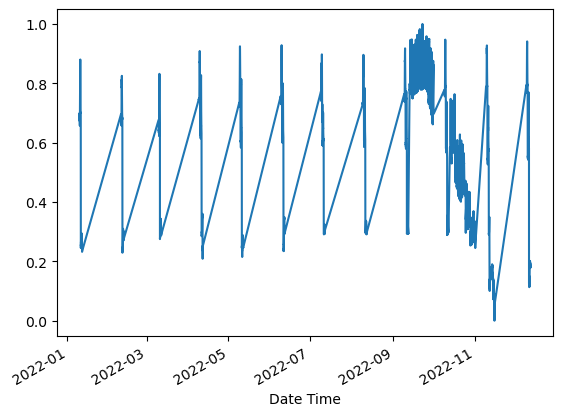

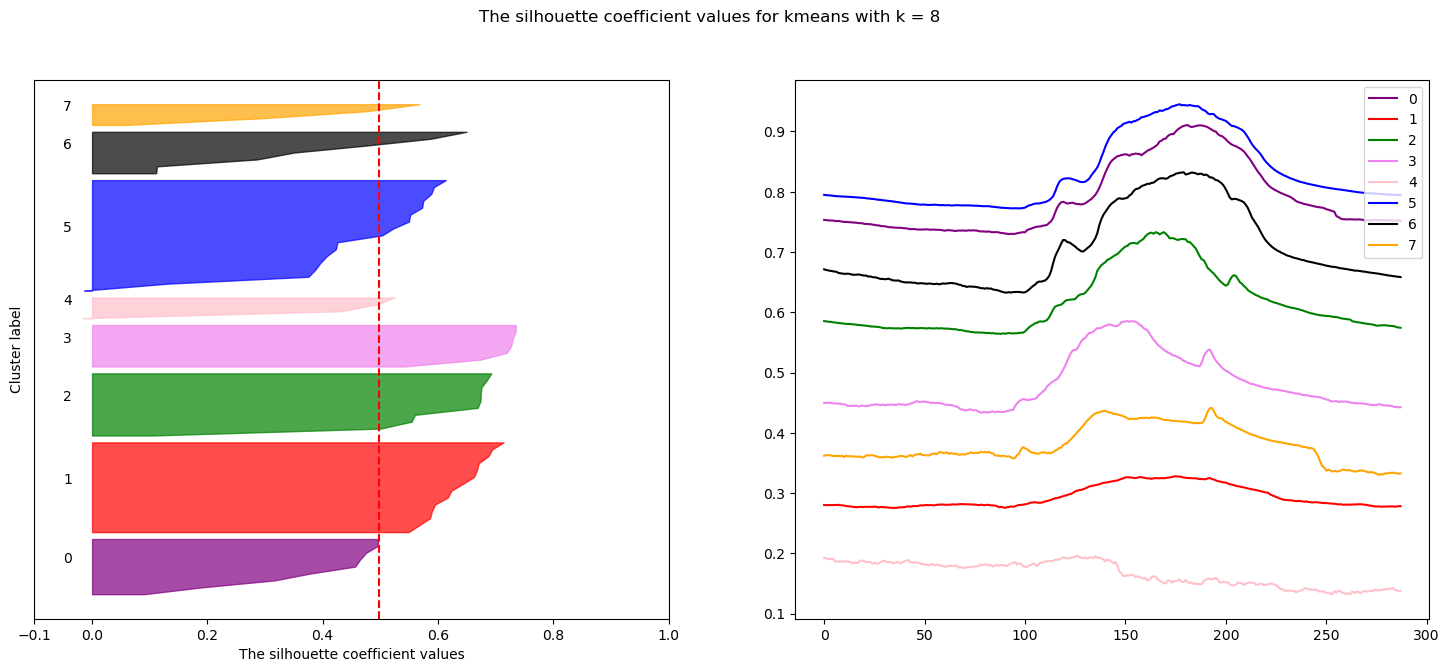

/Users/markwang/repos/ShapeSeries/Main/kmeans_sensors.py:212: FutureWarning: DataFrame indexer for .iloc is deprecated and will be removed in a future version.
consider using .loc with a DataFrame indexer for automatic alignment.
  kmeans_ts_dict = {}
/Users/markwang/repos/ShapeSeries/Main/kmeans_sensors.py:212: FutureWarning: DataFrame indexer for .iloc is deprecated and will be removed in a future version.
consider using .loc with a DataFrame indexer for automatic alignment.
  kmeans_ts_dict = {}
/Users/markwang/repos/ShapeSeries/Main/kmeans_sensors.py:212: FutureWarning: DataFrame indexer for .iloc is deprecated and will be removed in a future version.
consider using .loc with a DataFrame indexer for automatic alignment.
  kmeans_ts_dict = {}
/Users/markwang/repos/ShapeSeries/Main/kmeans_sensors.py:212: FutureWarning: DataFrame indexer for .iloc is deprecated and will be removed in a future version.
consider using .loc with a DataFrame indexer for automatic alignment.
  kmeans_ts_di

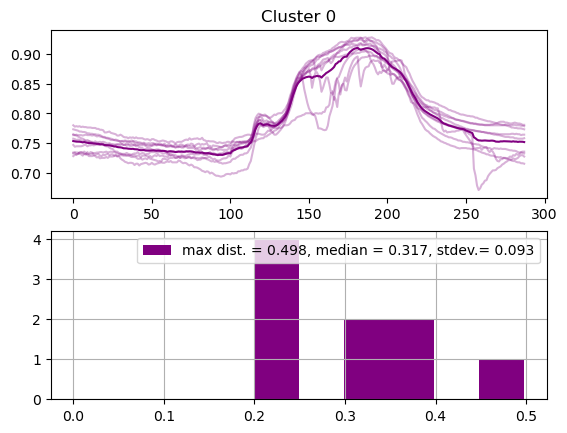

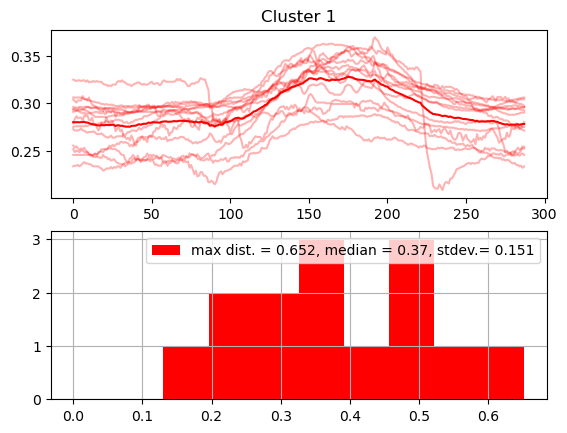

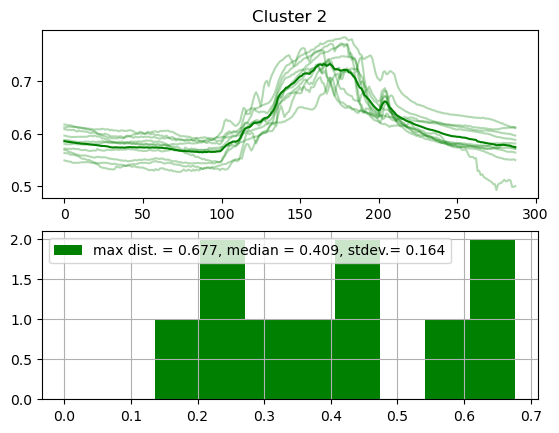

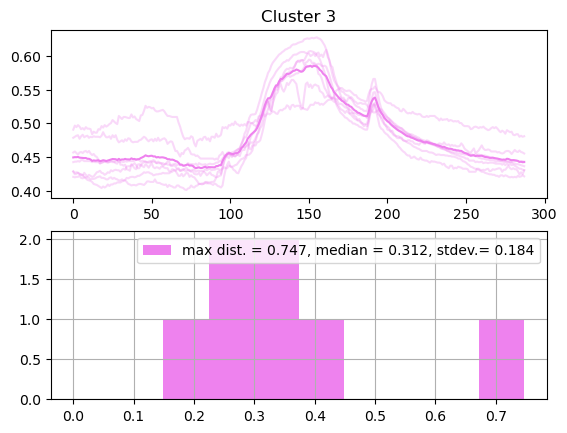

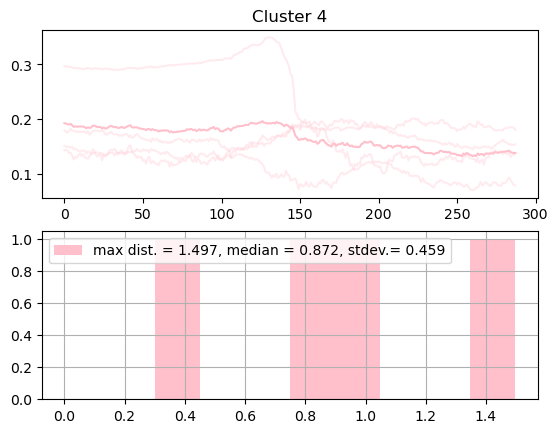

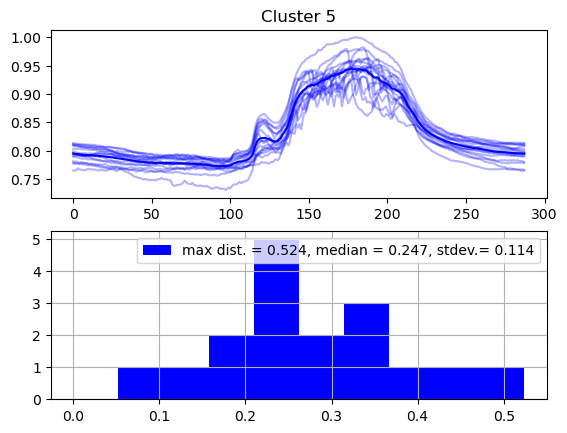

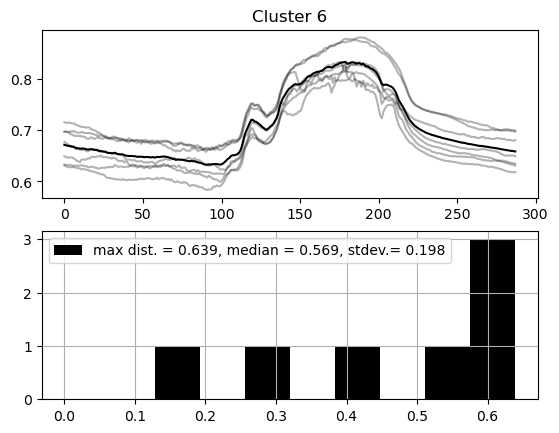

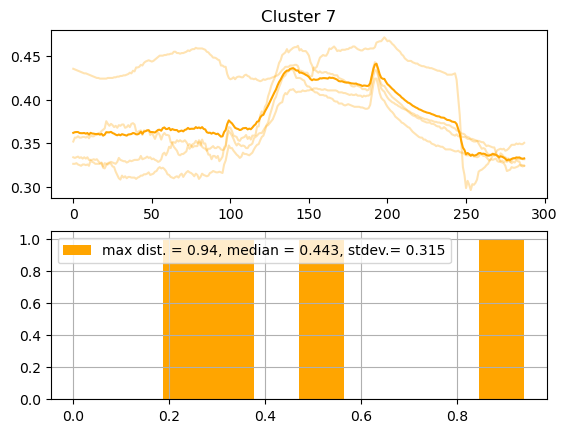

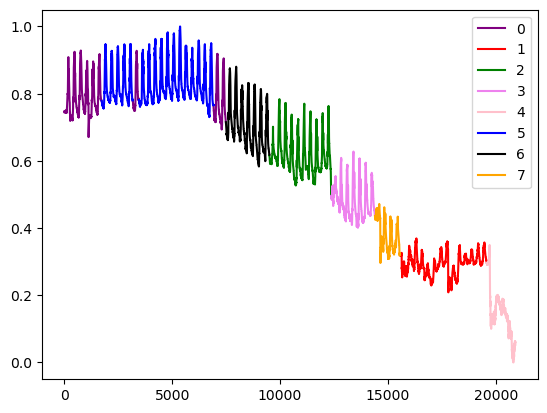

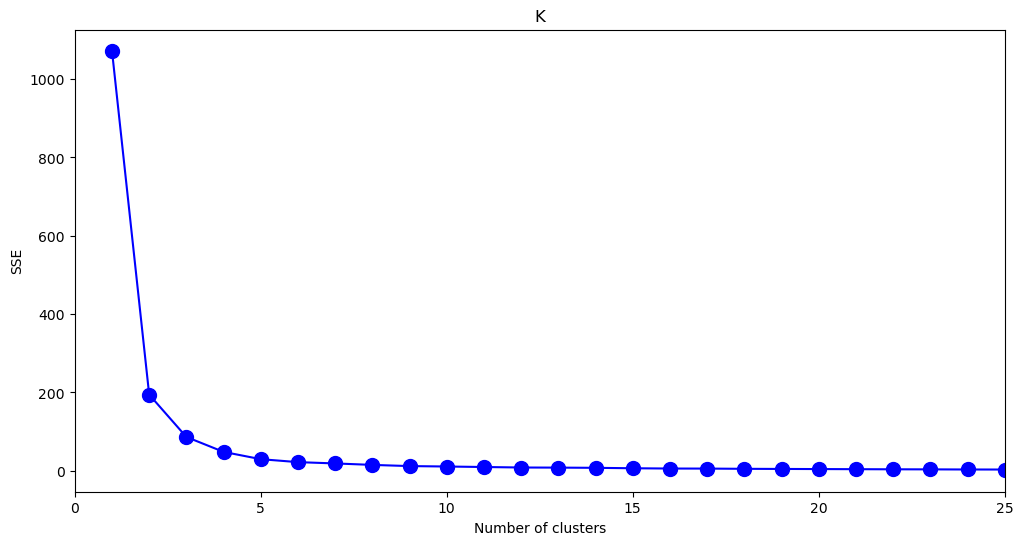

In [12]:
thresh_df_km,std_df_km,centroids_km,SSE_km,CHS_km,SC_km  = kmeans_ts(data_scaled,k,slide_len,m, color_list)

In [13]:
performance_table = [['Method', 'SSE', 'SC', 'CHS'], 
         ['Kmeans', SSE_km[k-1], SC_km, CHS_km], 
         ['Kmedoids', SSE_kmed[k-1], SC_kmed, CHS_kmed]]

print(tabulate(performance_table))

if cluster_method == 'km':
    thresh_df,std_df,centroids,SSE,CHS,SC = thresh_df_km,std_df_km,centroids_km,SSE_km,CHS_km,SC_km
if cluster_method == 'kmed':
    thresh_df,std_df,centroids,SSE,CHS,SC = thresh_df_kmed,std_df_kmed,centroids_kmed,SSE_kmed,CHS_kmed,SC_kmed

--------  ------------------  -------------------  ------------------
Method    SSE                 SC                   CHS
Kmeans    14.856556928491223  0.49856471543703523  644.3777747086738
Kmedoids  15.814941639706458  0.5441426372671767   237.50637475848842
--------  ------------------  -------------------  ------------------


SCAN ONLINE DATA: 

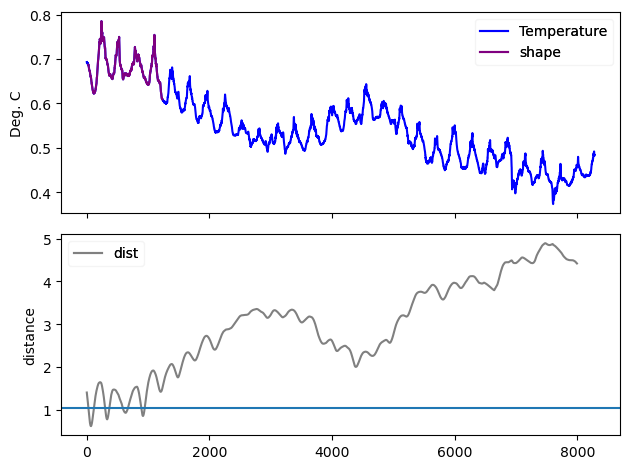

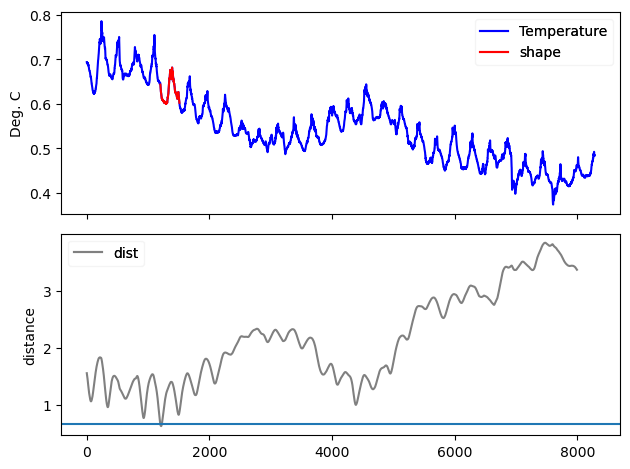

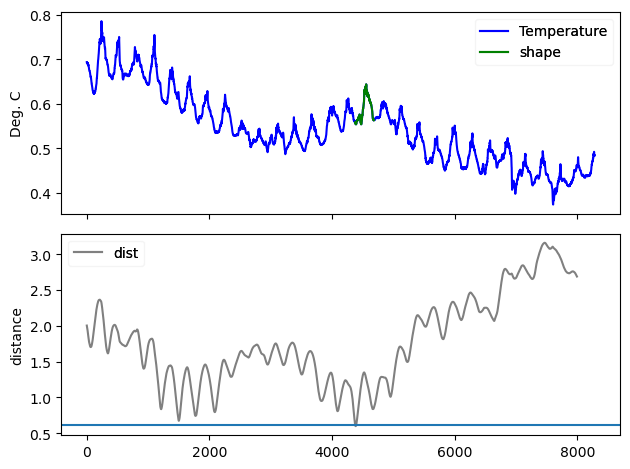

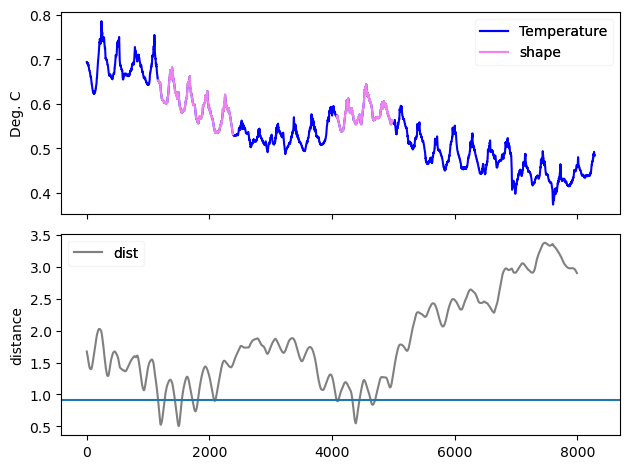

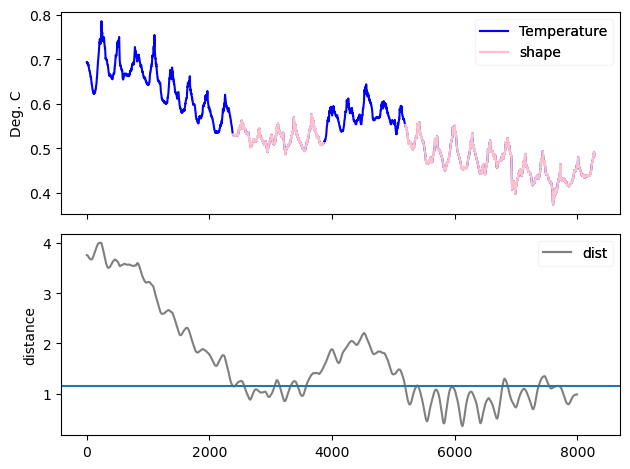

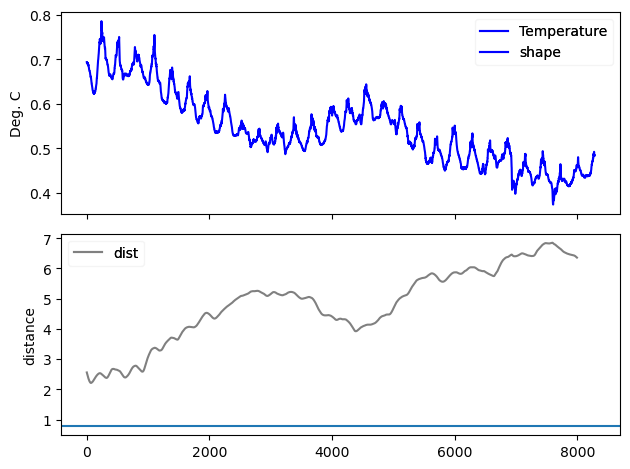

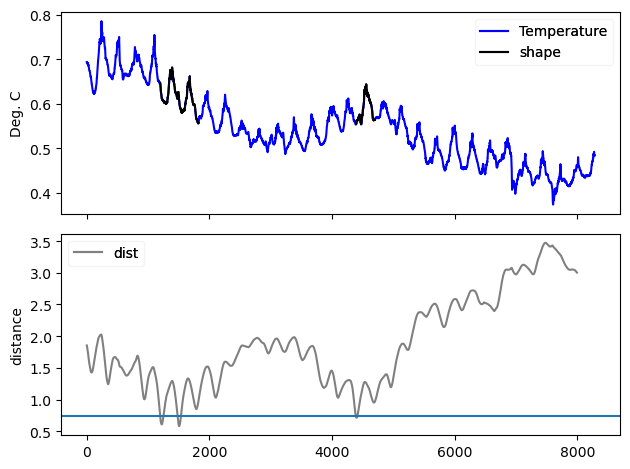

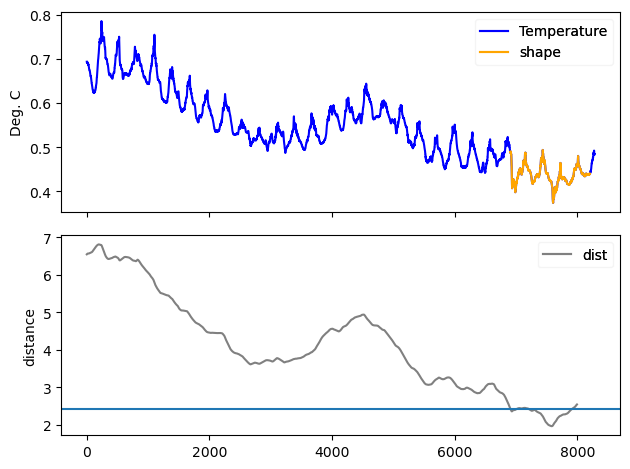

/Users/markwang/micromamba/envs/ml-env-x86/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [14]:
target_data = df_online_1
match_idx = {}
shape = {}
shape_dist_fltrd = {}
shape_dist = {}

for i in range(0,k): 
    match_idx["{0}".format(i)],shape["{0}".format(i)],ts,shape_dist_fltrd["{0}".format(i)],shape_dist["{0}".format(i)] = shape_scan(centroids[i],target_data,param,units,color_list[i],thresh_df.iloc[0,i])
    
shape_df = pd.DataFrame.from_dict(shape)
shape_dist_fltrd_df = pd.DataFrame.from_dict(shape_dist_fltrd)
shape_dist_df = pd.DataFrame.from_dict(shape_dist)

mask = {}
median  = {}

for i in range(0,k):
    mask["{0}".format(i)] = shape_df.iloc[:,i].isnull()
    median["{0}".format(i)] = shape_df.iloc[:,i].median()
    
mask_df = pd.DataFrame.from_dict(mask)


CREATE NEW DATAFRAME OF SHAPE MATCHES:

In [15]:
data=target_data                       
data = data.reset_index()
b = data.loc[:,'Date Time']

##### Resolve minimum value conflicts #################################################################################################################
symbol_check = shape_dist_fltrd_df.copy()
df_temp = shape_dist_fltrd_df.copy()
symbol_series= df_temp.idxmin(axis=1)
symbol_series_post = symbol_series.copy()
not_nan = symbol_series.index[~symbol_series.isnull()]
for item in not_nan:
    symbol_series_post[item:item+m] = symbol_series[item]
    
dist_bool = symbol_series
dist_bool.fillna(True,inplace=True)

ts_df = pd.concat([data.loc[:,'Date Time'],ts,shape_df], axis=1)
symbol_df = ts_df.copy()

for i in range(0,k):
    symbol_df['{0}'.format(i)].loc[symbol_series_post == '{0}'.format(i)] = median.get('{}'.format(i))
    symbol_df['{0}'.format(i)].loc[symbol_series_post != '{0}'.format(i)] = np.nan
    symbol_df[param] = symbol_df[param].mask(~mask_df['{0}'.format(i)])  

/var/folders/r_/dmfr50sj4rx58wk0tb0d12rw0000gn/T/ipykernel_26841/437998424.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  symbol_df['{0}'.format(i)].loc[symbol_series_post == '{0}'.format(i)] = median.get('{}'.format(i))
/var/folders/r_/dmfr50sj4rx58wk0tb0d12rw0000gn/T/ipykernel_26841/437998424.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  symbol_df['{0}'.format(i)].loc[symbol_series_post != '{0}'.format(i)] = np.nan


'Fuzzy' Matching:

In [16]:
symbol_df_fuzzy = symbol_df.copy()
symbol_df_fuzzy = symbol_df_fuzzy.set_index('Date Time')
symbol_df_fuzzy = symbol_df_fuzzy.drop([param],axis=1)
symbol_df_fuzzy.loc[:] = np.nan
symbol_df_fuzzy = symbol_df_fuzzy.reset_index()

#rows = symbol_df_fuzzy.index[symbol_df_fuzzy.loc[:,'shape_1':'shape_6'].isnull().all(1)]


#pattern = 0

for i in range(0,k):
    symbol_df_fuzzy['{0}'.format(i)].iloc[shape_dist_df['{0}'.format(i)] <=(thresh_df.iloc[0,i]+ (3*std_df.iloc[0,i])) ] = median.get('{}'.format(i))
      

#mp_df_mask = mp_df.copy()
#mp_df_mask = mp_df_mask.reset_index()
#mp_df = mp_df.reset_index()

mp_bool = symbol_series_post.copy()
mp_bool.fillna(True,inplace=True)

#mp_df_mask[0].iloc[mp_bool != True] = np.nan

symbol_df_fuzzy = symbol_df_fuzzy.set_index('Date Time')
symbol_df_fuzzy.iloc[symbol_series_post.notna()] = np.nan

#%% FILTER COMPETING FUZZY MATCHES 
#####################################################################################
#mp95 = np.percentile(mp_df[0],50)

min_df = np.nanmin(symbol_df_fuzzy,axis=1)
min_df = pd.DataFrame(min_df )
symbol_df_fuzzy = symbol_df_fuzzy.reset_index()

for i in range(0,k):
    symbol_df_fuzzy['{0}'.format(i)].iloc[symbol_df_fuzzy['{0}'.format(i)]>(min_df[0])] = np.nan

symbol_df_fuzzy = symbol_df_fuzzy.set_index('Date Time')
symbol_df_fuzzy_anom = symbol_df_fuzzy.copy()

tsfuzzy = symbol_df[param].copy().to_frame()
#mpfuzzy = mp_df[0].copy().to_frame()

#tsfuzzy.loc[(mpfuzzy[0]<=mp95)]=np.nan
tsfuzzy=pd.concat([tsfuzzy,b],axis=1)
tsfuzzy.set_index(['Date Time'],inplace=True)

ts_df= ts_df.reset_index()

/var/folders/r_/dmfr50sj4rx58wk0tb0d12rw0000gn/T/ipykernel_26841/2992702998.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  symbol_df_fuzzy['{0}'.format(i)].iloc[shape_dist_df['{0}'.format(i)] <=(thresh_df.iloc[0,i]+ (3*std_df.iloc[0,i])) ] = median.get('{}'.format(i))
/var/folders/r_/dmfr50sj4rx58wk0tb0d12rw0000gn/T/ipykernel_26841/2992702998.py:32: RuntimeWarning: All-NaN axis encountered
  min_df = np.nanmin(symbol_df_fuzzy,axis=1)
/var/folders/r_/dmfr50sj4rx58wk0tb0d12rw0000gn/T/ipykernel_26841/2992702998.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  symbol_df_fuzzy['{0}'.format(i)].iloc[symbol_df_fuzzy

REFORMAT DATAFRAMES FOR PLOTTING:

In [17]:
ts_df= ts_df.set_index(['Date Time'])
ts_df= ts_df.drop(['index'], axis=1)
symbol_df= symbol_df.set_index(['Date Time'])
#mp_df_mask = mp_df_mask.set_index(['Date Time'])
#mp_df = mp_df.set_index(['Date Time'])
# =============================================================================

nan_count = symbol_series_post.count()
length = len(symbol_series_post)

pcnt_match = round(((nan_count)/len(symbol_series_post))*100,2)

PLOT 1

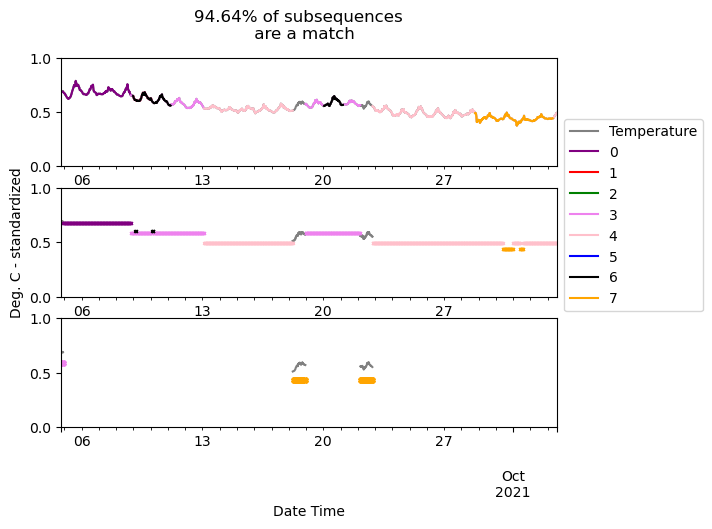

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=1)
ts_df.plot(y=[param], ax=axes[0], color = 'grey', alpha=1, use_index=True, subplots=True, legend=False)
symbol_df[param].plot(y=[param], ax=axes[1], color = 'grey', alpha=1, use_index=True, subplots=True)
tsfuzzy[param].plot(y=[param], ax=axes[1], color = 'grey', alpha=1, use_index=True, subplots=True)
tsfuzzy[param].plot(y=[param], ax=axes[2], color = 'grey', alpha=1, use_index=True, subplots=True)


for i in range(0,k):
    ts_df.plot(y=['{0}'.format(i)], ax=axes[0], color = color_list[i], alpha=1, use_index=True, subplots=True, legend=False)
    symbol_df.plot(y=['{0}'.format(i)], ax=axes[1], color = color_list[i],linestyle='none', alpha=1,marker='x', use_index=True, subplots=True,markersize=2,markevery=5)
    symbol_df_fuzzy.plot(y=['{0}'.format(i)], ax=axes[2], color = color_list[i],linestyle='none', alpha=1, subplots=True,marker = 'X', markersize=4,markevery=20)

axes[0].legend(bbox_to_anchor=(1, 0.5), prop={"size":10})
axes[1].get_legend().remove()
axes[2].get_legend().remove()
axes[0].set_xticks([])
axes[1].set_xticks([])
axes[0].set_ylim(bottom=0,top=1)
axes[1].set_ylim(bottom=0,top=1)
axes[2].set_ylim(bottom=0,top=1)
axes[1].set_ylabel("{} - standardized".format(units))

plt.savefig('Shape_Scan.png',dpi=300, bbox_inches = "tight") 
fig.suptitle('{}% of subsequences \n are a match'.format(pcnt_match))
plt.show()   

PLOT 2:

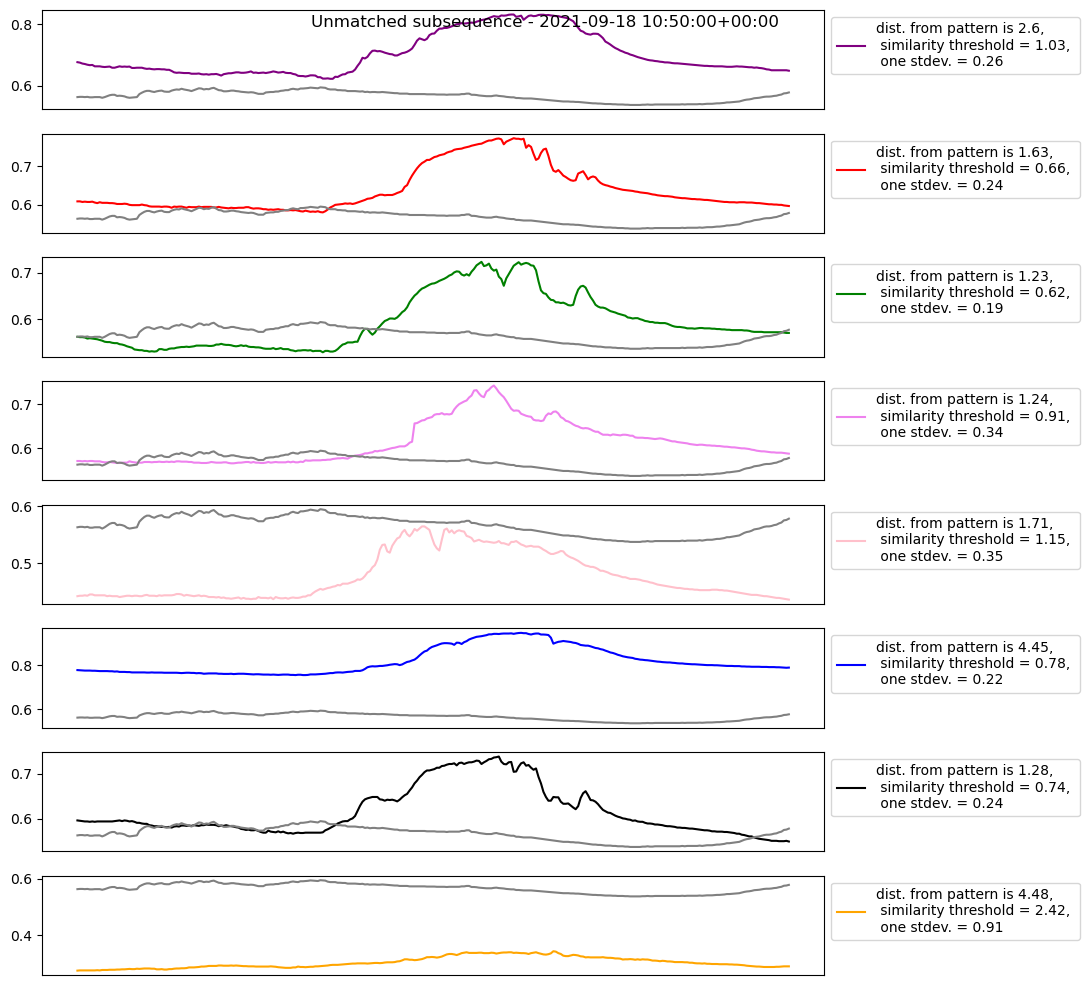

In [19]:
symbol_df = symbol_df.reset_index()
not_null = symbol_df[symbol_df[param].notnull()].index.tolist()
random_idx = random.choice(not_null)

idx = random_idx
#idx = 8000
date = b[idx]
data=target_data.reset_index()
target = (data['scaled'][idx:idx+m].to_frame()).reset_index()
target = target.drop(columns = ['index'])

ptrn_dist = {}

for i in range(0,k):
    ptrn_dist["{0}".format(i)] = round(shape_dist_df.loc[idx,"{0}".format(i)],2)

target_prototype = pd.concat([centroids,target], axis=1)

shape_dist_df.iloc[0,1]
#############################################################################
fig, axes = plt.subplots(nrows=k,figsize=(11,10))

for i in range(0,k):
    target_prototype.plot(y=[i], ax=axes[i], color = color_list[i], alpha=1, use_index=True, subplots=True, legend=False)
    target_prototype.plot(y=['scaled'], ax=axes[i], color = 'grey', alpha=1)
    axes[i].get_legend().remove()
    dist = ptrn_dist.get('{}'.format(i))
    std = round(std_df.loc[0,'{}'.format(i)],2)
    axes[i].set_xticks([])

    thresh = round(thresh_df.loc[0,'{}'.format(i)],2)
    axes[i].legend(['dist. from pattern is {}, \n similarity threshold = {}, \n one stdev. = {}'.format(dist,thresh,std)],bbox_to_anchor=(1, 1), prop={"size":10})

#plt.subplots_adjust(wspace=.1, hspace=.1)
fig.tight_layout()
fig.suptitle('Unmatched subsequence - {}'.format(date))
plt.savefig('Target_prototype_compare.png',dpi=300, bbox_inches = "tight") 
plt.show()
